This web application provides a way to explore ECMWF open datasets available at their [public portal](https://github.com/ecmwf/ecmwf-opendata) https://github.com/ecmwf/ecmwf-opendata. 

ECMWF open forecast dataset is available on their [portal https://data.ecmwf.int/forecasts](https://data.ecmwf.int/forecasts)

The application has interactive input fields that can be used to define data parameters and forecast date.  


In [1]:
# Application initialization
import mercury as mr

show_code = mr.Checkbox(value=False, label="Show code")

app = mr.App(
    title='Interactive IFS Data Exploration',
    description='Loading and Visualizing IFS Open Data',
    show_code=show_code.value
    
)


mercury.Checkbox

mercury.App

In [2]:
# helper functions
from cgan_ui.utils import get_possible_variables

get_possible_variables()

Available variables to plot are the following:
tp    - Total precipitation (mm/day)
sp    - Surface pressure (hPa)
msl   - Pressure at mean sea level (hPa)
t2m   - Two metre temperature (deg. C)
wind  - Wind speed (m/s)
ro    - Surface runoff water (m)



['tp', 'sp', 'msl', 't2m', 'wind', 'ro']

In [3]:
from cgan_ui.constants import DATA_PARAMS


params_map = {key: DATA_PARAMS[key]['name'] for key in DATA_PARAMS.keys()}
param_names = list(params_map.values())

vis_param = mr.Select(
    value=param_names[0], choices=param_names, label="Data Variable to Plot", url_key="vis_param"
)

mercury.Select

In [4]:
from cgan_ui.constants import TP_PLOT_UNITS

plot_units = None
if vis_param.value == DATA_PARAMS['tp']['name']:
    plot_units = mr.Select(
        value=TP_PLOT_UNITS[0], choices=TP_PLOT_UNITS, label="Accumulation Units", url_key="vis_param"
    )

mercury.Select

In [5]:
# from datetime import datetime
# from cgan_ui.utils import print_forecast_info
from cgan_ui.utils import get_forecast_data_dates

data_dates = get_forecast_data_dates()

ifs_date = mr.Select(
    choices=data_dates,
    value=data_dates[0],
    label="Forecast Initialization Date",
    url_key="ifs_date",
)

# print_forecast_info(datetime.strptime(ifs_date.value.lower(), "%b %d, %Y"))

mercury.Select

In [6]:
# helper functions
from datetime import datetime
from cgan_ui.utils import get_data_store_path
from cgan_ui.ecmwf_esm_viz import load_forecast

source = "ecmwf"
stream = "enfo"

store_path = get_data_store_path()
data_dir = store_path / "interim" / "EA" / source / stream
init_date = datetime.strptime(ifs_date.value, "%b %d, %Y")

data_viz_key = [key for key in params_map.keys() if params_map[key] == vis_param.value]


# load datasets
data = load_forecast(
    key=data_viz_key[0], forecast_init_date=init_date, data_dir=data_dir
)

Loading tp with lead time 30h from 20240404000000-30h-enfo-ef.nc
Loading tp with lead time 54h from 20240404000000-54h-enfo-ef.nc


In [7]:
from cgan_ui.constants import COUNTRY_NAMES

mask_area = mr.Select(
    choices=COUNTRY_NAMES,
    value=COUNTRY_NAMES[0],
    label="Area of Interest",
    url_key="mask_area",
)

mercury.Select

In [8]:
from cgan_ui.constants import COLOR_SCHEMES

color_style = mr.Select(
    choices=COLOR_SCHEMES,
    value=COLOR_SCHEMES[0],
    label="Visualization Color Style",
    url_key="color_style",
)

mercury.Select

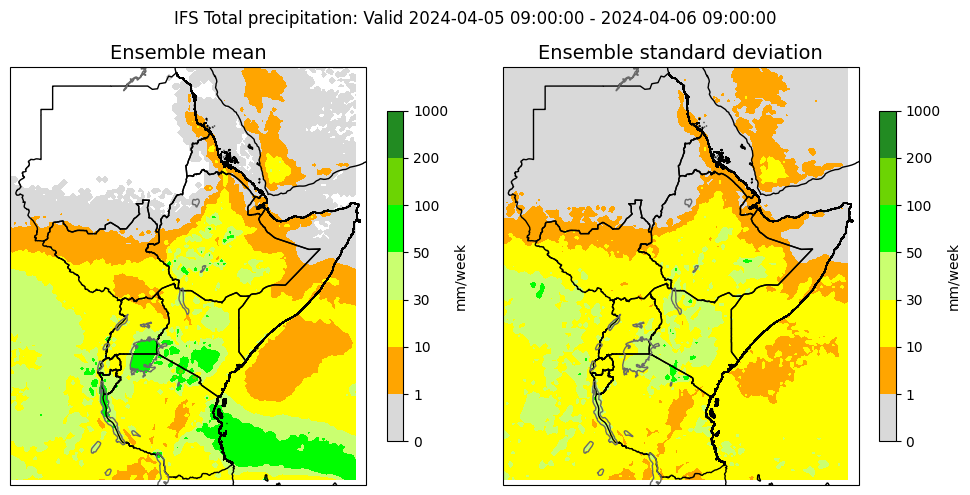

In [9]:
from cgan_ui.ecmwf_esm_viz import plot_forecast

# Plot the current data
plot_forecast(
    data,
    style=None if color_style.value == "Default" else color_style.value,
    region=mask_area.value,
    plot_units=None if plot_units is None else plot_units.value,
)

In [10]:
from cgan_ui.ecmwf_esm_viz import plot_forecast_ensemble

show_ensemble = mr.Checkbox(
    value=False,
    label="Visualize Ensemble Members",
    url_key="show_ensemble",
)

if show_ensemble.value:
    plot_forecast_ensemble(
        data,
        style=None if color_style.value == "Default" else color_style.value,
        region=mask_area.value,
        plot_units=None if plot_units is None else plot_units.value,
    )

mercury.Checkbox